In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchtext
from torchtext import data, datasets, vocab
from nltk.tokenize import word_tokenize
from models import EncoderBaseline, EncoderLSTM, Classifier
import nltk
nltk.download('punkt')
import torch.nn as nn



In [0]:
results = np.load('results_Baseline.npy')

# Training models

In [0]:
results = results.tolist()
tr_loss = results['train_loss']
vl_loss = results['val_loss']
vl_acc = results['val_accuracy']

Text(0.5, 1.0, 'Baseline encoder: training')

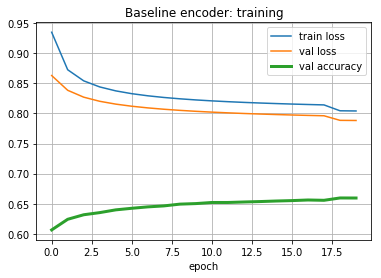

In [3]:
plt.plot(range(0,len(tr_loss)), tr_loss, label='train loss')
plt.plot(range(0,len(vl_loss)), vl_loss, label='val loss')
plt.plot(range(0,len(vl_acc)), vl_acc, label='val accuracy', linewidth=3)
plt.grid()
plt.xlabel('epoch')
plt.legend()
plt.title('Baseline encoder: training')

Text(0.5, 1.0, 'LSTM encoder: training')

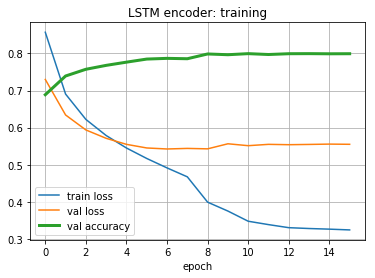

In [4]:
results = np.load('results_LSTM.npy')
results = results.tolist()
tr_loss = results['train_loss']
vl_loss = results['val_loss']
vl_acc = results['val_accuracy']

plt.plot(range(0,len(tr_loss)), tr_loss, label='train loss')
plt.plot(range(0,len(vl_loss)), vl_loss, label='val loss')
plt.plot(range(0,len(vl_acc)), vl_acc, label='val accuracy', linewidth=3)
plt.grid()
plt.xlabel('epoch')
plt.legend()
plt.title('LSTM encoder: training')

## Performance on SNLI tasks

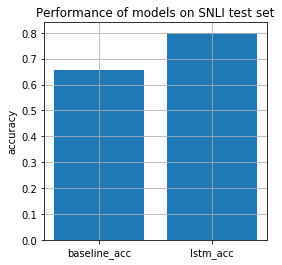

In [11]:
results = np.load('test_acc.npy')
results = results.tolist()
plt.figure(figsize=(4,4))
plt.bar(list(results), results.values())
plt.ylabel('accuracy')
plt.title('Performance of models on SNLI test set')
plt.grid()

## Performance on SentEval tasks

In [0]:
sentevalbase = {'MR': {'devacc': 58.79, 'acc': 47.69, 'ndev': 74, 'ntest': 74}, 'CR': {'devacc': 75.31, 'acc': 76.34, 'ndev': 3775, 'ntest': 3775}, 'SUBJ': {'devacc': 99.6, 'acc': 99.6, 'ndev': 5020, 'ntest': 5020}, 'MPQA': {'devacc': 76.0, 'acc': 76.08, 'ndev': 10606, 'ntest': 10606}, 'TREC': {'devacc': 64.58, 'acc': 67.8, 'ndev': 5452, 'ntest': 500}, 'SST2': {'devacc': 73.05, 'acc': 70.35, 'ndev': 872, 'ntest': 1821}, 'SICKEntailment': {'devacc': 79.4, 'acc': 77.63, 'ndev': 500, 'ntest': 4927}}

In [0]:
sent_accbase = []
for i in sentevalbase:
  sent_accbase.append(sentevalbase[i]['acc'])

In [0]:
senteval = {'MR': {'devacc': 60.19, 'acc': 52.86, 'ndev': 74, 'ntest': 74}, 'CR': {'devacc': 79.12, 'acc': 79.29, 'ndev': 3775, 'ntest': 3775}, 'SUBJ': {'devacc': 99.6, 'acc': 99.6, 'ndev': 5020, 'ntest': 5020}, 'MPQA': {'devacc': 84.62, 'acc': 84.81, 'ndev': 10606, 'ntest': 10606}, 'TREC': {'devacc': 67.86, 'acc': 73.2, 'ndev': 5452, 'ntest': 500}, 'SST2': {'devacc': 77.87, 'acc': 78.03, 'ndev': 872, 'ntest': 1821}, 'SICKEntailment': {'devacc': 80.4, 'acc': 77.57, 'ndev': 500, 'ntest': 4927}}

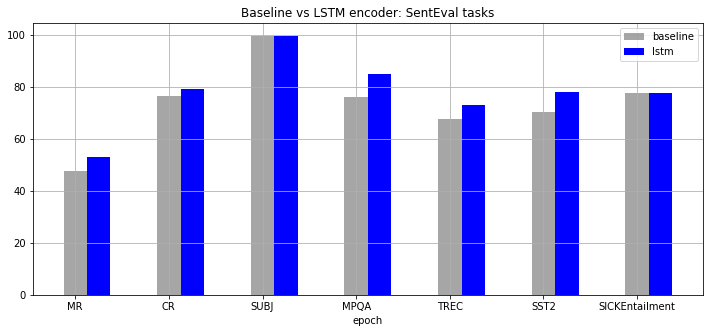

In [53]:
sent_acc = []
for i in senteval:
  sent_acc.append(senteval[i]['acc'])
plt.figure(figsize=(12,5))
x = np.arange(len(senteval))
plt.bar(x, sent_accbase, color=('grey'), width = 0.25, alpha=0.7)
plt.bar(x + 0.25, sent_acc, color=('blue'), width = 0.25)
plt.grid()
plt.xlabel('epoch')
plt.xticks(ticks=x,labels=list(senteval))
plt.legend(('baseline','lstm'))
plt.title('Baseline vs LSTM encoder: SentEval tasks')
plt.show()

# Inference example

In [0]:

def load_data():
    #all_data = {"train": None, "dev": None, "test": None}
    x_field = data.Field(lower=True,
                 tokenize=word_tokenize,
                 include_lengths=True)
    y_field = data.Field(sequential=False,
                 pad_token=None,
                 unk_token=None,
                 is_target=True)
    all_data = {}
    all_data["train"], all_data["dev"], all_data["test"]= datasets.SNLI.splits(x_field, y_field)
    return all_data, x_field, y_field
def load_glove_model(glovedir):
    print("Loading Glove Model")
    model = torchtext.vocab.Vectors(glovedir)
    print("Done.")
    return model

all_data, texts, label = load_data()
word_embeddings = load_glove_model('small_glove_torchnlp.txt')
texts.build_vocab(all_data["train"], vectors = word_embeddings)


In [0]:
encoder = EncoderBaseline()
encoder.load_state_dict(torch.load('Baselineenc.pt'))
inp = 300
clf = Classifier(input_size = 4*inp,
                 hidden_size = 512, 
                 classes = ["entailment", "contradiction", "neutral"],
                 encoder = encoder, 
                 embedding = texts.vocab.vectors).to('cuda')
clf.load_state_dict(torch.load('Baseline.pt'))

In [0]:

encoder = EncoderLSTM(emb_size=300, 
                  enc_size=2048, 
                  embedding=texts.vocab.vectors)
encoder.load_state_dict(torch.load('LSTM_enc.pt'))
inp = 2048
clf = Classifier(input_size = 4*inp,
                 hidden_size = 512, 
                 classes = ["entailment", "contradiction", "neutral"],
                 encoder = encoder, 
                 embedding = texts.vocab.vectors).to('cuda')
clf.load_state_dict(torch.load('LSTM.pt'))

In [60]:
labels = ['entailment', 'contradiction', 'neutral']
hypotheses = ['A boy was inside', 'A boy has no friends', 'It is bright']

for hypothesis in hypotheses:
  premise = 'A boy was outside and he was playing with friends'
  print(premise)
  print(hypothesis)
  premise = word_tokenize(premise)
  hypothesis = word_tokenize(hypothesis)
  
  premise = torch.tensor([texts.vocab.stoi[token] for token in premise]).to('cuda')
  hypothesis = torch.tensor([texts.vocab.stoi[token] for token in hypothesis]).to('cuda')
  premise_l = torch.tensor(len(premise)).to('cuda')
  hypothesis_l = torch.tensor(len(hypothesis)).to('cuda')
  y_pred = clf.forward(
      (premise.expand(1, -1).transpose(0, 1).cpu(), premise_l.cpu()),
      (hypothesis.expand(1, -1).transpose(0, 1).cpu(), hypothesis_l.cpu())
  )
  print(labels[y_pred.argmax().item()])


A boy was outside and he was playing with friends
A boy was inside
entailment
A boy was outside and he was playing with friends
A boy has no friends
contradiction
A boy was outside and he was playing with friends
It is bright
neutral
